In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

# Use 3 decimal places in output display
pd.set_option("display.precision", 3)

# Don't wrap repr(DataFrame) across additional lines
pd.set_option("display.expand_frame_repr", False)

# Set max rows displayed in output to 25
pd.set_option("display.max_rows", 25)

In [60]:
data = pd.read_csv("C:/Users/tnr_s/Desktop/deneme/izmirbb-ulasim.csv")

###  EDA (Exploratory Data Analysis)  


In [61]:
data.head()

,_id,Tarih,Kurum Kodu,Tam,Öğrenci,Öğretmen,Serbest Kart,Personel,Bilet,Altmış Yaş,Çocuk,Gönüllü
0,1,2015-06-01T00:00:00,Eshot,1.447,925.0,35.0,237.0,0.0,0.0,0.0,0,0
1,2,2015-06-01T00:00:00,Izdeniz,0.000,3.0,0.0,2.0,0.0,0.0,0.0,0,0
2,3,2015-06-01T00:00:00,Izdeniz-Araba,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0,0
3,4,2015-06-01T00:00:00,Izulas,928.000,961.0,19.0,185.0,0.0,0.0,0.0,0,0
4,5,2015-06-01T00:00:00,İzban,0.000,0.0,0.0,0.0,0.0,0.0,0.0,0,0


In [62]:
data.isna().sum()

_id             0
Tarih           0
Kurum Kodu      0
Tam             0
Öğrenci         0
Öğretmen        0
Serbest Kart    0
Personel        0
Bilet           0
Altmış Yaş      0
Çocuk           0
Gönüllü         0
dtype: int64

In [63]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
_id,19511.0,9756.000,5632.485,1.0,4878.500,9756.000,14633.500,19511.0
Tam,19511.0,97.922,127.322,0.0,10.000,43.816,144.746,998.0
Öğrenci,19511.0,54.209,99.431,-1.0,4.139,18.000,64.035,998.0
Öğretmen,19511.0,123.620,232.804,0.0,0.000,3.007,135.000,999.0
Serbest Kart,19511.0,31.849,94.872,0.0,0.000,5.007,24.865,998.0
Personel,19511.0,47.119,151.358,0.0,0.000,0.000,3.031,999.0
Bilet,19511.0,130.379,249.393,0.0,0.000,1.936,95.000,999.0
Altmış Yaş,19511.0,61.209,187.107,-5.0,0.000,1.387,6.126,999.0
Çocuk,19511.0,3.712,18.864,0.0,0.000,0.000,0.000,275.0
Gönüllü,19511.0,0.384,3.580,0.0,0.000,0.000,0.000,116.0


In [64]:
data["Kurum Kodu"].value_counts()

Eshot                             2041
Izdeniz-Araba                     2041
İzban                             2039
Metro                             2038
Izdeniz                           2017
Izulas                            2016
İzmir Doğal Yaşam Parkı           1400
Teleferik                         1030
BİSİM                              907
Tramvay Konak                      762
Tramvay Karşıyaka                  760
İBB Bornova Buz Pisti              515
Tramvay                            513
İzmir BB - Atik Yönetimi DB        361
Seferihisar Mot. Taş. Kooperat     349
Metro Maskematik                   200
İzdeniz Maskematik                 196
Grand Plaza A.Ş                    128
NOSTALJİK TRAMVAY                  103
Izfas                               79
IZELMAN                             15
Eserkent İbrahim Kavur İlköğre       1
Name: Kurum Kodu, dtype: int64

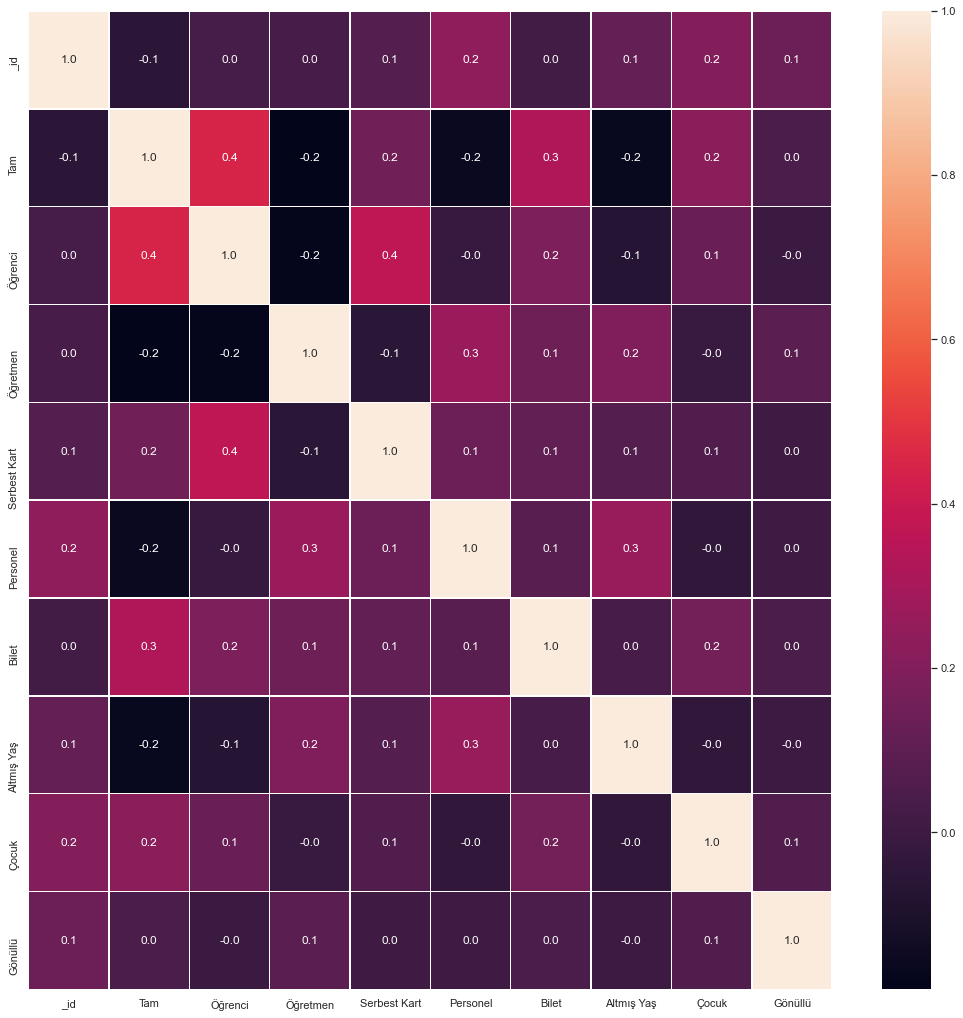

In [65]:
#correlation map
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax);

### Feature Engineering

In [66]:
data['Tarih'] = pd.to_datetime(data['Tarih']).dt.date

In [67]:
# Price of Ticket     2015             2016       2017      2018       2019       2020   
# Tam                 2.25             2.4        2.6       2.86       3          3.56                       
# Ogrenci             1.25             1.35       1.5       1.65       1.8        1.64   
# Ogretmen            1.6              1.75       2         2.2        2.5        3 
# Yasli               115(One)         125(One)   1.5       1.65       1.8        3       

In [68]:
data["year"] = data['Tarih'].map(lambda x: x.year)
data["month"] = data['Tarih'].map(lambda x: x.month)
data["day"] = data['Tarih'].map(lambda x: x.day)

In [69]:
column_indices = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11]
new_names = ['tarih','kurum_kodu','tam','ogrenci','ogretmen','serbest_kart','personel','bilet','altmis_yas','cocuk','gonullu']
old_names = data.columns[column_indices]
data.rename(columns=dict(zip(old_names, new_names)), inplace=True)

In [70]:
data_2015 = data[(data["year"] == 2015) & (data["month"] <= 12)]
data_2016 = data[(data["year"] == 2016) & (data["month"] <= 12)]
data_2017 = data[(data["year"] == 2017) & (data["month"] <= 12)]
data_2018 = data[(data["year"] == 2018) & (data["month"] <= 12)]
data_2019 = data[(data["year"] == 2019) & (data["month"] <= 12)]
data_2020 = data[(data["year"] == 2020) & (data["month"] <= 12)]

In [71]:
### 2015

In [72]:
column_names = ["tam", "ogrenci", "ogretmen", "bilet","serbest_kart", "personel", "altmis_yas"]
for i in column_names:
    if i == 'tam':
        data_2015[i +"_total"] = data_2015[i] * 2.25
    elif i == 'ogrenci':
        data_2015[i + '_total'] = data_2015[i] * 1.25
    elif i == 'ogretmen':
        data_2015[i + '_total'] = data_2015[i] * 1.60
    elif i == 'bilet':
        data_2015[i + '_total'] = data_2015[i] * 2.25
    elif i == 'serbest_kart':
        data_2015[i + '_total'] = data_2015[i] * 1
    elif i == 'personel':
        data_2015[i + '_total'] = data_2015[i] * 2.25
    elif i == 'altmis_yas':
        data_2015[i + '_total'] = data_2015[i] * 115
    
    else:
        print("There is a missing value ")

In [73]:
## 2016

In [74]:
column_names = ["tam", "ogrenci", "ogretmen", "bilet","serbest_kart", "personel", "altmis_yas"]
for i in column_names:
    if i == 'tam':
        data_2016[i +"_total"] = data_2016[i] * 2.40
    elif i == 'ogrenci':
        data_2016[i + '_total'] = data_2016[i] * 1.35
    elif i == 'ogretmen':
        data_2016[i + '_total'] = data_2016[i] * 1.75
    elif i == 'bilet':
        data_2016[i + '_total'] = data_2016[i] * 2.40
    elif i == 'serbest_kart':
        data_2016[i + '_total'] = data_2016[i] * 1
    elif i == 'personel':
        data_2016[i + '_total'] = data_2016[i] * 2.40
    elif i == 'altmis_yas':
        data_2016[i + '_total'] = data_2016[i] * 125
    
    else:
        print("There is a missing value ")

In [75]:
## 2017

In [76]:
column_names = ["tam", "ogrenci", "ogretmen", "bilet","serbest_kart", "personel", "altmis_yas"]
for i in column_names:
    if i == 'tam':
        data_2017[i +"_total"] = data_2017[i] * 2.60
    elif i == 'ogrenci':
        data_2017[i + '_total'] = data_2017[i] * 1.50
    elif i == 'ogretmen':
        data_2017[i + '_total'] = data_2017[i] * 2.00
    elif i == 'bilet':
        data_2017[i + '_total'] = data_2017[i] * 2.60
    elif i == 'serbest_kart':
        data_2017[i + '_total'] = data_2017[i] * 1
    elif i == 'personel':
        data_2017[i + '_total'] = data_2017[i] * 2.60
    elif i == 'altmis_yas':
        data_2017[i + '_total'] = data_2017[i] * 1.50
    
    else:
        print("There is a missing value ")

In [77]:
## 2018

In [78]:
column_names = ["tam", "ogrenci", "ogretmen", "bilet","serbest_kart", "personel", "altmis_yas"]
for i in column_names:
    if i == 'tam':
        data_2018[i +"_total"] = data_2018[i] * 2.86
    elif i == 'ogrenci':
        data_2018[i + '_total'] = data_2018[i] * 1.65
    elif i == 'ogretmen':
        data_2018[i + '_total'] = data_2018[i] * 2.20
    elif i == 'bilet':
        data_2018[i + '_total'] = data_2018[i] * 2.86
    elif i == 'serbest_kart':
        data_2018[i + '_total'] = data_2018[i] * 1
    elif i == 'personel':
        data_2018[i + '_total'] = data_2018[i] * 2.86
    elif i == 'altmis_yas':
        data_2018[i + '_total'] = data_2018[i] * 1.65
    
    else:
        print("There is a missing value ")

In [79]:
## 2019

In [80]:
column_names = ["tam", "ogrenci", "ogretmen", "bilet","serbest_kart", "personel", "altmis_yas"]
for i in column_names:
    if i == 'tam':
        data_2019[i +"_total"] = data_2019[i] * 3
    elif i == 'ogrenci':
        data_2019[i + '_total'] = data_2019[i] * 1.80
    elif i == 'ogretmen':
        data_2019[i + '_total'] = data_2019[i] * 2.5
    elif i == 'bilet':
        data_2019[i + '_total'] = data_2019[i] * 3
    elif i == 'serbest_kart':
        data_2019[i + '_total'] = data_2019[i] * 1
    elif i == 'personel':
        data_2019[i + '_total'] = data_2019[i] * 3
    elif i == 'altmis_yas':
        data_2019[i + '_total'] = data_2019[i] * 1.80
    
    else:
        print("There is a missing value ")

In [81]:
## 2020

In [82]:
column_names = ["tam", "ogrenci", "ogretmen", "bilet","serbest_kart", "personel", "altmis_yas"]
for i in column_names:
    if i == 'tam':
        data_2020[i +"_total"] = data_2020[i] * 3
    elif i == 'ogrenci':
        data_2020[i + '_total'] = data_2020[i] * 1.64
    elif i == 'ogretmen':
        data_2020[i + '_total'] = data_2020[i] * 3
    elif i == 'bilet':
        data_2020[i + '_total'] = data_2020[i] * 3.56
    elif i == 'serbest_kart':
        data_2020[i + '_total'] = data_2020[i] * 1
    elif i == 'personel':
        data_2020[i + '_total'] = data_2020[i] * 3.56
    elif i == 'altmis_yas':
        data_2020[i + '_total'] = data_2020[i] * 3
    
    else:
        print("There is a missing value ")

In [83]:
merging_data = [data_2015, data_2016, data_2017, data_2018, data_2019, data_2020]
data = pd.concat(merging_data)
data_copy = data.copy()
data

,_id,tarih,kurum_kodu,tam,ogrenci,ogretmen,serbest_kart,personel,bilet,altmis_yas,...,year,month,day,tam_total,ogrenci_total,ogretmen_total,bilet_total,serbest_kart_total,personel_total,altmis_yas_total
0,1,2015-06-01,Eshot,1.447,925.000,35.0,237.000,0.0,0.0,0.0,...,2015,6,1,3.256,1156.250,56.0,0.00,237.000,0.00,0.0
1,2,2015-06-01,Izdeniz,0.000,3.000,0.0,2.000,0.0,0.0,0.0,...,2015,6,1,0.000,3.750,0.0,0.00,2.000,0.00,0.0
2,3,2015-06-01,Izdeniz-Araba,0.000,0.000,0.0,0.000,0.0,0.0,0.0,...,2015,6,1,0.000,0.000,0.0,0.00,0.000,0.00,0.0
3,4,2015-06-01,Izulas,928.000,961.000,19.0,185.000,0.0,0.0,0.0,...,2015,6,1,2088.000,1201.250,30.4,0.00,185.000,0.00,0.0
4,5,2015-06-01,İzban,0.000,0.000,0.0,0.000,0.0,0.0,0.0,...,2015,6,1,0.000,0.000,0.0,0.00,0.000,0.00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19506,19507,2020-12-31,Metro Maskematik,259.000,38.000,4.0,0.000,0.0,0.0,8.0,...,2020,12,31,777.000,62.320,12.0,0.00,0.000,0.00,24.0
19507,19508,2020-12-31,NOSTALJİK TRAMVAY,28.000,8.000,2.0,0.000,0.0,0.0,0.0,...,2020,12,31,84.000,13.120,6.0,0.00,0.000,0.00,0.0
19508,19509,2020-12-31,Seferihisar Mot. Taş. Kooperat,2.442,339.000,21.0,336.000,166.0,0.0,74.0,...,2020,12,31,7.326,555.960,63.0,0.00,336.000,590.96,222.0
19509,19510,2020-12-31,Tramvay Karşıyaka,4.825,1.188,52.0,260.000,158.0,9.0,213.0,...,2020,12,31,14.475,1.948,156.0,32.04,260.000,562.48,639.0


In [84]:
def thresholdArrange(data):
    column_names = ["tam", "ogrenci", "ogretmen", "bilet","serbest_kart", "personel", "altmis_yas"]
    column_names_new = ["threshold_tam",
                        "threshold_ogrenci",
                        "threshold_ogretmen",
                        "threshold_bilet",
                        "threshold_serbest_kart",
                        "threshold_personel",
                        "threshold_altmis_yas"]
    for i in column_names:
        if i == column_names[0]:
            threshold = sum(data[column_names[0]]) / len(data[column_names[0]])
            data[column_names_new[0]] = ["enough" if j > threshold else "not enough" for j in data[column_names[0]]]
            
        elif i == column_names[1]:
            threshold = sum(data[column_names[1]]) / len(data[column_names[1]])
            data[column_names_new[1]] = ["enough" if j > threshold else "not enough" for j in data[column_names[1]]]
        
        elif i == column_names[2]:
            threshold = sum(data[column_names[2]]) / len(data[column_names[2]])
            data[column_names_new[2]] = ["enough" if j > threshold else "not enough" for j in data[column_names[2]]]
        
        elif i == column_names[3]:
            threshold = sum(data[column_names[3]]) / len(data[column_names[3]])
            data[column_names_new[3]] = ["enough" if j > threshold else "not enough" for j in data[column_names[3]]]
        
        elif i == column_names[4]:
            threshold = sum(data[column_names[4]]) / len(data[column_names[4]])
            data[column_names_new[4]] = ["enough" if j > threshold else "not enough" for j in data[column_names[4]]]
            
        elif i == column_names[5]:
            threshold = sum(data[column_names[5]]) / len(data[column_names[5]])
            data[column_names_new[5]] = ["enough" if j > threshold else "not enough" for j in data[column_names[5]]]
        
        elif i == column_names[6]:
            threshold = sum(data[column_names[6]]) / len(data[column_names[6]])
            data[column_names_new[6]] = ["enough" if j > threshold else "not enough" for j in data[column_names[6]]]
        
        else:
            print("wrong value")
        
    

if __name__ == '__main__':
    thresholdArrange(data)

In [85]:
data

,_id,tarih,kurum_kodu,tam,ogrenci,ogretmen,serbest_kart,personel,bilet,altmis_yas,...,serbest_kart_total,personel_total,altmis_yas_total,threshold_tam,threshold_ogrenci,threshold_ogretmen,threshold_bilet,threshold_serbest_kart,threshold_personel,threshold_altmis_yas
0,1,2015-06-01,Eshot,1.447,925.000,35.0,237.000,0.0,0.0,0.0,...,237.000,0.00,0.0,not enough,enough,not enough,not enough,enough,not enough,not enough
1,2,2015-06-01,Izdeniz,0.000,3.000,0.0,2.000,0.0,0.0,0.0,...,2.000,0.00,0.0,not enough,not enough,not enough,not enough,not enough,not enough,not enough
2,3,2015-06-01,Izdeniz-Araba,0.000,0.000,0.0,0.000,0.0,0.0,0.0,...,0.000,0.00,0.0,not enough,not enough,not enough,not enough,not enough,not enough,not enough
3,4,2015-06-01,Izulas,928.000,961.000,19.0,185.000,0.0,0.0,0.0,...,185.000,0.00,0.0,enough,enough,not enough,not enough,enough,not enough,not enough
4,5,2015-06-01,İzban,0.000,0.000,0.0,0.000,0.0,0.0,0.0,...,0.000,0.00,0.0,not enough,not enough,not enough,not enough,not enough,not enough,not enough
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19506,19507,2020-12-31,Metro Maskematik,259.000,38.000,4.0,0.000,0.0,0.0,8.0,...,0.000,0.00,24.0,enough,not enough,not enough,not enough,not enough,not enough,not enough
19507,19508,2020-12-31,NOSTALJİK TRAMVAY,28.000,8.000,2.0,0.000,0.0,0.0,0.0,...,0.000,0.00,0.0,not enough,not enough,not enough,not enough,not enough,not enough,not enough
19508,19509,2020-12-31,Seferihisar Mot. Taş. Kooperat,2.442,339.000,21.0,336.000,166.0,0.0,74.0,...,336.000,590.96,222.0,not enough,enough,not enough,not enough,enough,enough,enough
19509,19510,2020-12-31,Tramvay Karşıyaka,4.825,1.188,52.0,260.000,158.0,9.0,213.0,...,260.000,562.48,639.0,not enough,not enough,not enough,not enough,enough,enough,enough


In [86]:
## values that altmis_yas_total is NaN because sometimes older people did not use izmir card so I filled with 0
data['altmis_yas_total'] = data['altmis_yas_total'].fillna(0)

In [87]:
data["total_people"]= data["tam"] + data["ogrenci"] + data["ogretmen"] + data["serbest_kart"] + data["personel"] + data["bilet"] + data["altmis_yas"]
data["people_average"] = (data["tam"] + data["ogrenci"] + data["ogretmen"] + data["serbest_kart"] + data["personel"] + data["bilet"] + data["altmis_yas"]) / 7
data["daily_total_price"] = data["tam_total"] + data["ogrenci_total"] + data["ogretmen_total"] + data["bilet_total"] + data["serbest_kart_total"] + data["personel_total"] + data["altmis_yas_total"]
data["per_people_price"] = data["daily_total_price"] / data["total_people"]
data = data.fillna(0)

In [88]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [89]:
data['kurum_kodu_new'] = le.fit_transform(data['kurum_kodu']) + 1 

column_names_new = ["threshold_tam",
                        "threshold_ogrenci",
                        "threshold_ogretmen",
                        "threshold_bilet",
                        "threshold_serbest_kart",
                        "threshold_personel",
                        "threshold_altmis_yas"]

for i in column_names_new:
    data[i] = le.fit_transform(data[i])

In [90]:
data.head()

,_id,tarih,kurum_kodu,tam,ogrenci,ogretmen,serbest_kart,personel,bilet,altmis_yas,...,threshold_ogretmen,threshold_bilet,threshold_serbest_kart,threshold_personel,threshold_altmis_yas,total_people,people_average,daily_total_price,per_people_price,kurum_kodu_new
0,1,2015-06-01,Eshot,1.447,925.0,35.0,237.0,0.0,0.0,0.0,...,1,1,0,1,1,1198.447,171.207,1452.506,1.212,3
1,2,2015-06-01,Izdeniz,0.000,3.0,0.0,2.0,0.0,0.0,0.0,...,1,1,1,1,1,5.000,0.714,5.750,1.150,6
2,3,2015-06-01,Izdeniz-Araba,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,1,1,0.000,0.000,0.000,0.000,7
3,4,2015-06-01,Izulas,928.000,961.0,19.0,185.0,0.0,0.0,0.0,...,1,1,0,1,1,2093.000,299.000,3504.650,1.674,9
4,5,2015-06-01,İzban,0.000,0.0,0.0,0.0,0.0,0.0,0.0,...,1,1,1,1,1,0.000,0.000,0.000,0.000,19


### Visualization 

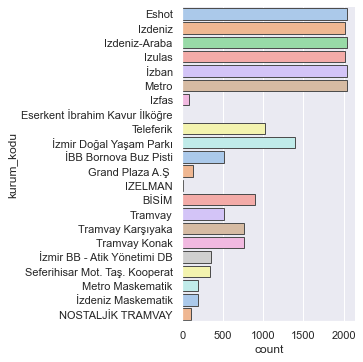

In [91]:
sns.catplot(y = "kurum_kodu", kind = "count",
            palette = "pastel", edgecolor = ".3",
            data = data)
plt.show()

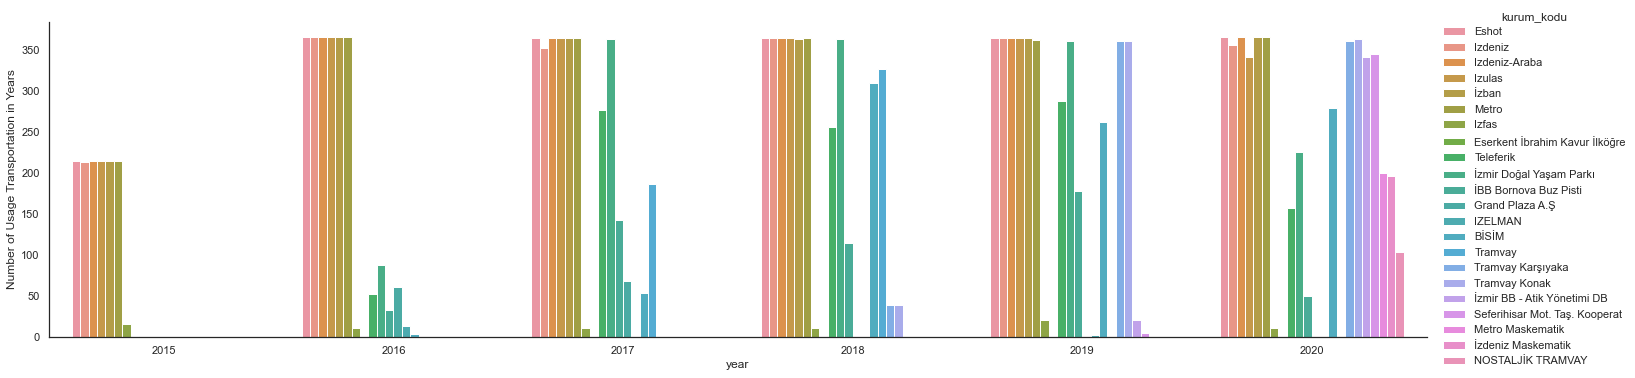

In [92]:
with sns.axes_style('white'):
    g = sns.factorplot("year", data=data, aspect=4.0, kind='count',
                       hue='kurum_kodu', order=range(2015, 2021))
    g.set_ylabels('Number of Usage Transportation in Years');

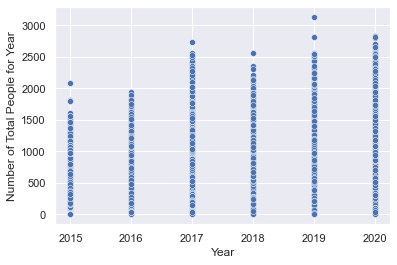

In [93]:
ax = sns.scatterplot(data=data, x="year", y="total_people");
ax.set(xlabel='Year', ylabel='Number of Total People for Year');

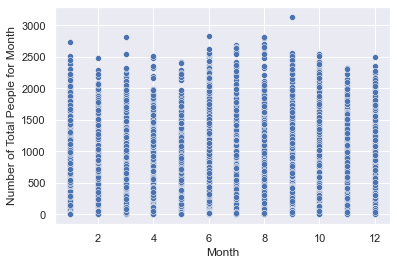

In [94]:
ax = sns.scatterplot(data=data, x="month", y="total_people");
ax.set(xlabel='Month', ylabel='Number of Total People for Month');

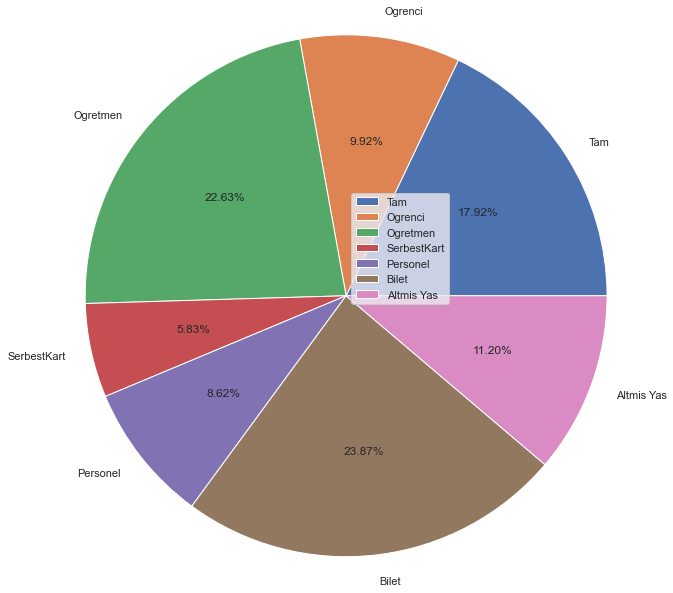

In [95]:
values = [data["tam"].sum(), data["ogrenci"].sum() ,data["ogretmen"].sum(), data["serbest_kart"].sum(), data["personel"].sum(), data["bilet"].sum(), data["altmis_yas"].sum()]
valuesList = np.array(values)
mylabels = ["Tam", "Ogrenci", "Ogretmen", "SerbestKart", "Personel", "Bilet", "Altmis Yas"]
plt.pie(valuesList, labels = mylabels, radius = 3, autopct='%1.2f%%')
plt.legend()
plt.show() 

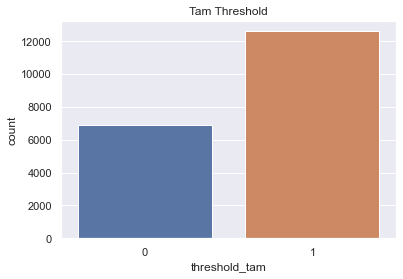

In [96]:
sns.set(style="darkgrid")
sns.countplot(data['threshold_tam'])
plt.title('Tam Threshold');

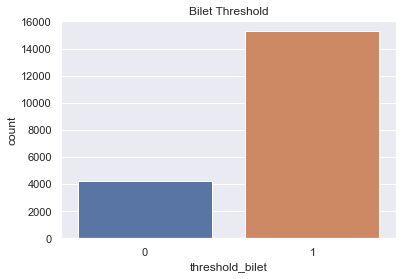

In [97]:
sns.set(style="darkgrid")
sns.countplot(data['threshold_bilet'])
plt.title('Bilet Threshold');

# Modeling

In [98]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error
import xgboost as xgb 

In [99]:
data.shape

(19511, 34)

In [100]:
data.describe().T

,count,mean,std,min,25%,50%,75%,max
_id,19511.0,9756.000,5632.485,1.0,4878.500,9756.000,14633.500,1.951e+04
tam,19511.0,97.922,127.322,0.0,10.000,43.816,144.746,9.980e+02
ogrenci,19511.0,54.209,99.431,-1.0,4.139,18.000,64.035,9.980e+02
ogretmen,19511.0,123.620,232.804,0.0,0.000,3.007,135.000,9.990e+02
serbest_kart,19511.0,31.849,94.872,0.0,0.000,5.007,24.865,9.980e+02
...,...,...,...,...,...,...,...,...
total_people,19511.0,546.306,556.036,0.0,39.000,310.000,968.474,3.137e+03
people_average,19511.0,78.044,79.434,0.0,5.571,44.286,138.353,4.482e+02
daily_total_price,19511.0,1343.025,1456.591,0.0,97.560,675.440,2339.596,9.442e+03
per_people_price,19511.0,inf,NaN,0.0,2.083,2.439,2.762,inf


In [101]:
y = data["daily_total_price"]
x = data.drop(["daily_total_price","per_people_price", "_id", "tarih", "cocuk", "gonullu", "kurum_kodu", "tarih"], axis = 1)

In [102]:
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=1) # Test : 0.2, train : 0.8

In [103]:
X_train, X_val, y_train, y_val  = train_test_split(X_train, y_train, test_size=0.25, random_state=1) # 0.25 x 0.80 = validation : 0.20

In [105]:
print("X_train:", X_train.shape)
print("X_test:", X_test.shape)
print("y_train:", y_train.shape)
print("y_test:", y_test.shape)
print("X_val:", X_val.shape)
print("y_val:", y_val.shape)

X_train: (11706, 27)
X_test: (3903, 27)
y_train: (11706,)
y_test: (3903,)
X_val: (3902, 27)
y_val: (3902,)


In [106]:
xgboost_val = xgb.XGBRegressor().fit(X_train,y_train)
y_hat = xgboost_val.predict(X_val)
np.sqrt(mean_squared_error(y_val, y_hat))

66.87446741863403

In [107]:
xgboost_test = xgb.XGBRegressor().fit(X_train,y_train)
y_hat_test = xgboost_test.predict(X_test)
np.sqrt(mean_squared_error(y_test, y_hat_test))

67.48137717366203

In [108]:
def testingScore(X_train, y_train, X_test, y_test):
    xgboost_test = xgb.XGBRegressor().fit(X_train, y_train)
    train_score = xgboost_test.score(X_train, y_train)
    test_score = xgboost_test.score(X_test, y_test)
    
    return print(f'XGBoost Train Score: {train_score} \nXGBoost Test Score: {test_score}'.format(train_score, test_score))

In [109]:
testingScore(X_train, y_train, X_test, y_test)

XGBoost Train Score: 0.9998283889195666 
XGBoost Test Score: 0.9979218447021697


In [110]:
def hyperParameterTuning(X_train, y_train):
    param_tuning = {
        'learning_rate': [0.01, 0.1],
        'max_depth': [3, 5, 7, 10],
        'min_child_weight': [1, 3, 5],
        'subsample': [0.5, 0.7],
        'colsample_bytree': [0.5, 0.7],
        'n_estimators' : [100, 200, 500],
        'objective': ['reg:squarederror']
    }

    xgb_model = XGBRegressor()

    gsearch = GridSearchCV(estimator = xgb_model,
                           param_grid = param_tuning,
                           cv = 5,
                           n_jobs = -1,
                           verbose = 1)

    gsearch.fit(X_train,y_train)

    return gsearch.best_params_

In [111]:
#hyperParameterTuning(X_train, y_train)

In [112]:
#{'colsample_bytree': 0.7,
# 'learning_rate': 0.1,
# 'max_depth': 5,
# 'min_child_weight': 5,
# 'n_estimators': 500,
# 'objective': 'reg:squarederror',
# 'subsample': 0.5}

In [113]:
tuning_xgb = xgb.XGBRegressor(colsample_bytree=0.7,
                              learning_rate = 0.1,
                              max_depth = 5,
                              min_child_weight = 5,
                              n_estimators = 500,
                              objective = 'reg:squarederror',
                              subsample = 0.5
                             ).fit(X_train, y_train)

In [114]:
y_pred_xgb = tuning_xgb.predict(X_test)

result = np.sqrt(mean_squared_error(y_test, y_pred_xgb))

y_pred_xgb_val = tuning_xgb.predict(X_val)

result_val = np.sqrt(mean_squared_error(y_val, y_pred_xgb_val))


print("RMSE of Test: ", result)
print("RMSE of Validation: ", result_val)

RMSE of Test:  47.58277157112667
RMSE of Validation:  47.08131063274288


In [115]:
## Values of score after parameter tuning
def tuningScore(X_train, y_train, X_test, y_test):
    tuning_xgb = xgb.XGBRegressor(colsample_bytree=0.7,
                              learning_rate = 0.1,
                              max_depth = 5,
                              min_child_weight = 5,
                              n_estimators = 500,
                              objective = 'reg:squarederror',
                              subsample = 0.5
                             ).fit(X_train, y_train)
    tuning_train_score = tuning_xgb.score(X_train, y_train)
    tuning_test_score = tuning_xgb.score(X_test, y_test)
    
    return print(f'XGBoost Train Score: {tuning_train_score} \nXGBoost Test Score: {tuning_test_score}'.format(tuning_train_score, tuning_test_score))

In [116]:
tuningScore(X_train, y_train, X_test, y_test)

XGBoost Train Score: 0.9998550436183397 
XGBoost Test Score: 0.9989667400544562
